In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("hitters.csv")

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.00,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.00,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.00,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.50,N


- #### 322 Sample 
- #### 20 Variable

In [7]:
df.shape

(322, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [9]:
df.isnull().sum().sort_values(ascending = False)

Salary       59
AtBat         0
Hits          0
Errors        0
Assists       0
PutOuts       0
Division      0
League        0
CWalks        0
CRBI          0
CRuns         0
CHmRun        0
CHits         0
CAtBat        0
Years         0
Walks         0
RBI           0
Runs          0
HmRun         0
NewLeague     0
dtype: int64

- #### There are only missing values in Salary variable which is our target variable.
- #### Maybe need to drop these values because imputing these values might cause bias in model.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,322.00,380.93,153.40,16.00,255.25,379.50,512.00,687.00
Hits,322.00,101.02,46.45,1.00,64.00,96.00,137.00,238.00
HmRun,322.00,10.77,8.71,0.00,4.00,8.00,16.00,40.00
Runs,322.00,50.91,26.02,0.00,30.25,48.00,69.00,130.00
RBI,322.00,48.03,26.17,0.00,28.00,44.00,64.75,121.00
Walks,322.00,38.74,21.64,0.00,22.00,35.00,53.00,105.00
Years,322.00,7.44,4.93,1.00,4.00,6.00,11.00,24.00
CAtBat,322.00,2648.68,2324.21,19.00,816.75,1928.00,3924.25,14053.00
CHits,322.00,717.57,654.47,4.00,209.00,508.00,1059.25,4256.00
CHmRun,322.00,69.49,86.27,0.00,14.00,37.50,90.00,548.00


- #### Between 75% and Max. stages of data, there are some suspicious situations.
- #### For example, In CAtBati Chits, CHmRun variables there are some inbalanced view in %75 - Max. stages of data. There may be outliers in these variables. Let's check in more detail percentages.

In [11]:
df.describe([0, 0.05, 0.50, 0.95, 0.99]).T

,count,mean,std,min,0%,5%,50%,95%,99%,max
AtBat,322.00,380.93,153.40,16.00,16.00,161.00,379.50,609.90,658.59,687.00
Hits,322.00,101.02,46.45,1.00,1.00,39.00,96.00,174.00,210.79,238.00
HmRun,322.00,10.77,8.71,0.00,0.00,0.00,8.00,28.95,33.00,40.00
Runs,322.00,50.91,26.02,0.00,0.00,17.00,48.00,94.00,107.79,130.00
RBI,322.00,48.03,26.17,0.00,0.00,14.00,44.00,96.00,112.37,121.00
Walks,322.00,38.74,21.64,0.00,0.00,11.05,35.00,78.00,93.58,105.00
Years,322.00,7.44,4.93,1.00,1.00,1.00,6.00,17.00,19.79,24.00
CAtBat,322.00,2648.68,2324.21,19.00,19.00,216.50,1928.00,7125.60,8749.97,14053.00
CHits,322.00,717.57,654.47,4.00,4.00,54.00,508.00,2017.15,2500.34,4256.00
CHmRun,322.00,69.49,86.27,0.00,0.00,2.00,37.50,265.65,373.12,548.00


- #### When we go down with more detailed partitioning some variables like Walks, CHmRun seems all proper.
- #### But for CAtBat, CHits variables, suspicious view is still continues.This may be due to outliers. At least we reduced to variable possibilities for outliers but going to check with more detailed way.

- #### Dataset has so many different variables. 
- #### Seperating variables categorically or numerically according to their classes.

In [12]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [13]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and \
              df[col].dtypes != "O"]

In [14]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and \
              df[col].dtypes == "O"]

In [15]:
cat_cols = cat_cols + num_but_cat

In [16]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [17]:
cat_cols

['League', 'Division', 'NewLeague']

In [18]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [19]:
num_cols = [col for col in num_cols if col not in num_but_cat]

In [20]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [21]:
cat_but_car

[]

- #### Checking categoric variables ratios, class sizes.

In [22]:
for col in cat_cols:
    print(pd.DataFrame({col: df[col].value_counts(),
                       "Ratio": 100 * df[col].value_counts() / len(df)}),
          end = "\n\n\n")

        League  Ratio
League               
A          175  54.35
N          147  45.65


          Division  Ratio
Division                 
W              165  51.24
E              157  48.76


           NewLeague  Ratio
NewLeague                  
A                176  54.66
N                146  45.34




- #### There are 3 categorical variables which have balanced classes.
- #### Looking at the effects of these variables on the target variable.

In [23]:
for col in cat_cols:
    print(pd.DataFrame({"Target Mean": df.groupby(col)["Salary"].mean()}),
          end = "\n\n\n")

        Target Mean
League             
A            542.00
N            529.12


          Target Mean
Division             
E              624.27
W              450.88


           Target Mean
NewLeague             
A               537.11
N               534.55




- #### There are not so much difference in playing different leagues but playing in A league make slight difference.
- #### Playing in division E created a significant salary difference.
- #### Saw thet there are not a significant differences in playing different leagues. Attaching new league effected same.

- **Correlation**

In [24]:
corr = df[num_cols].corr()

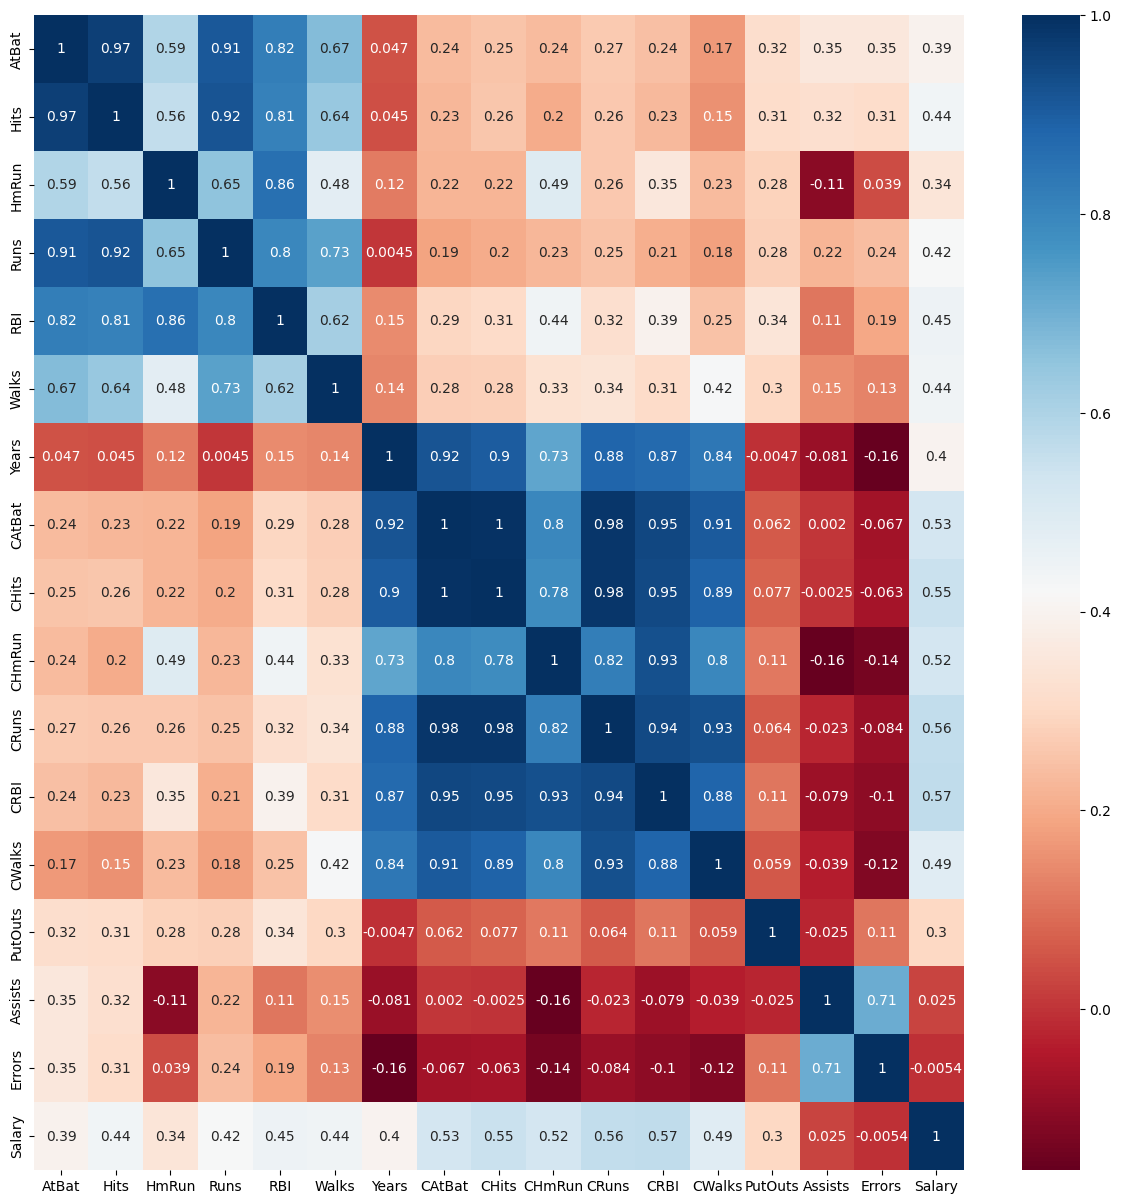

In [25]:
plt.figure(figsize = (15, 15))

sns.heatmap(corr, cmap = "RdBu", annot = True)

plt.show()

- #### Among the dependent variables, some variables have more than 90% correlation with each other.It means, these variables are expressing same infofrmation. To define these:
* Runs, Hits --> more than 90% correlation with AtBat.
* CAtBat, CHits --> more than 90% correlation with Years.
* CRBI --> more than 90% correlation with CHmRun.
- #### There are high amount of variables and some of them are stating the same information so we do not need them. 
- #### These variables can be dropped.

- #### There were suspicions about outliers.
- #### Checking these variables with boxplot.

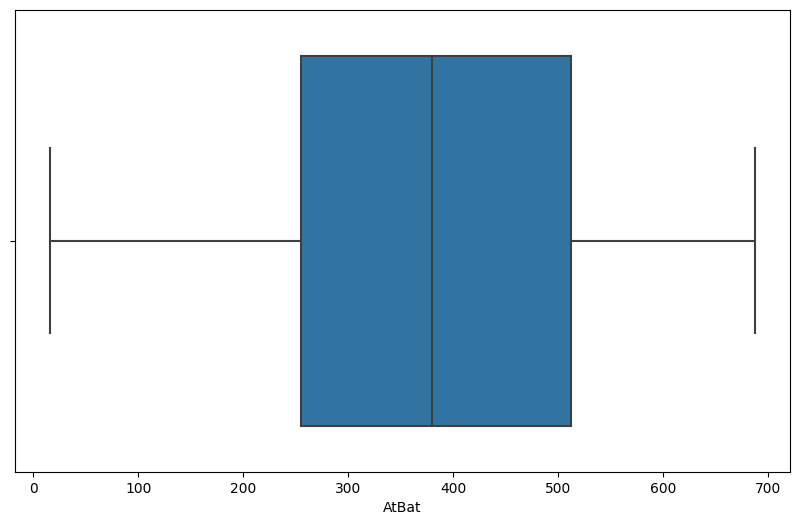

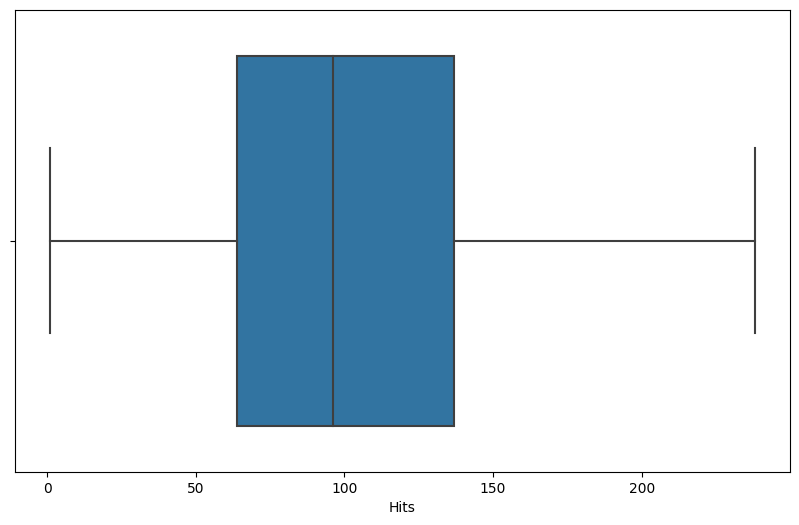

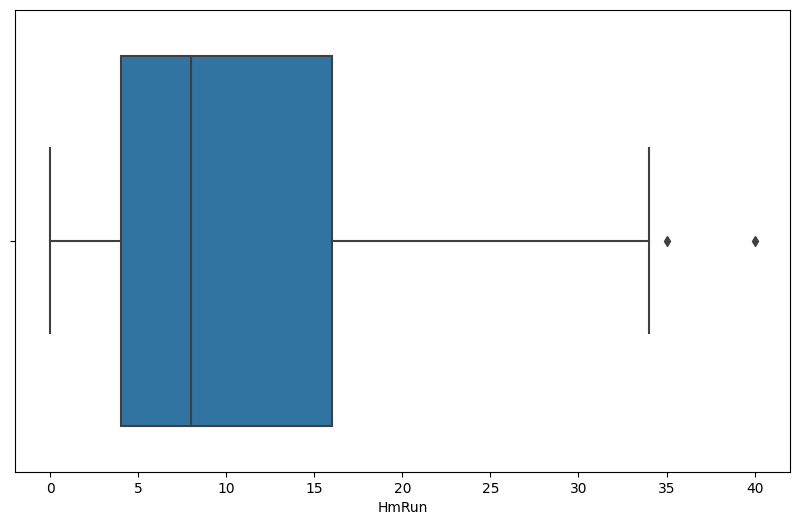

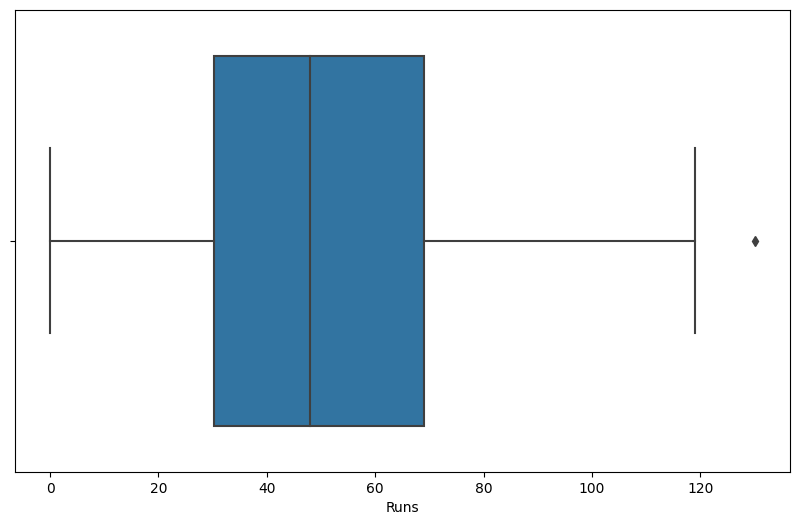

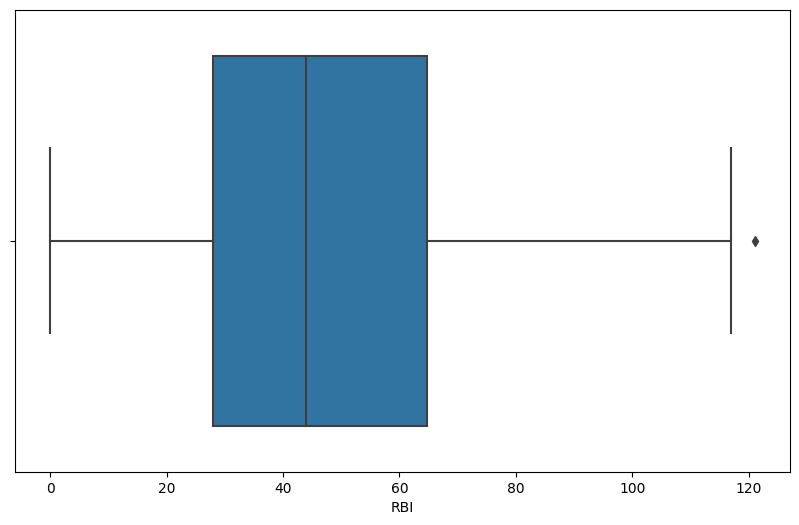

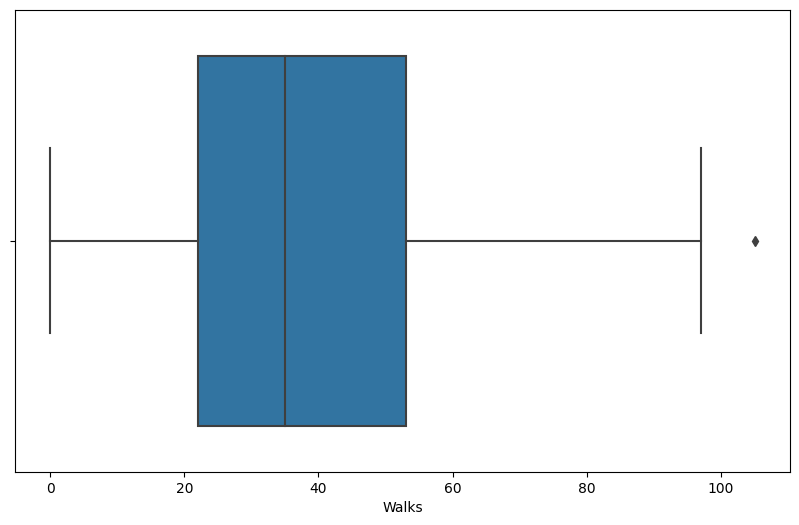

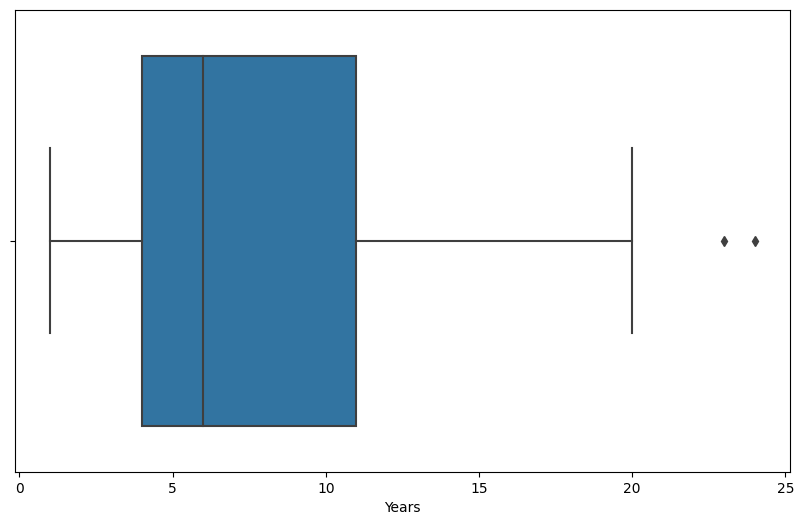

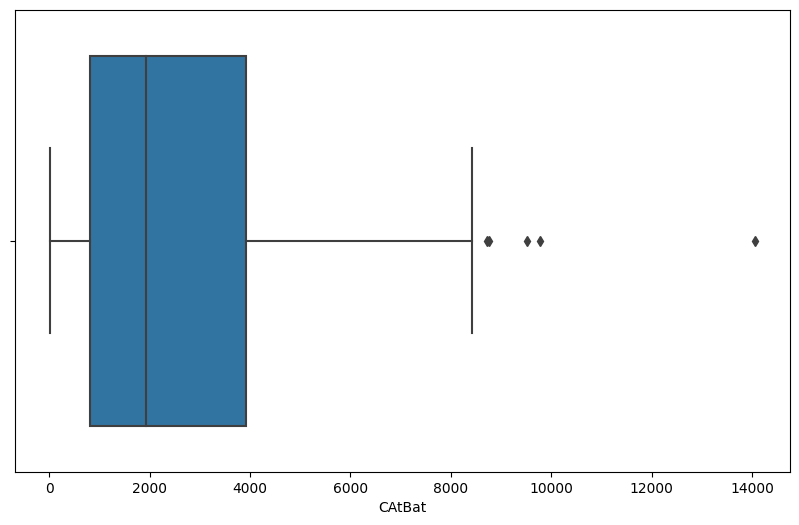

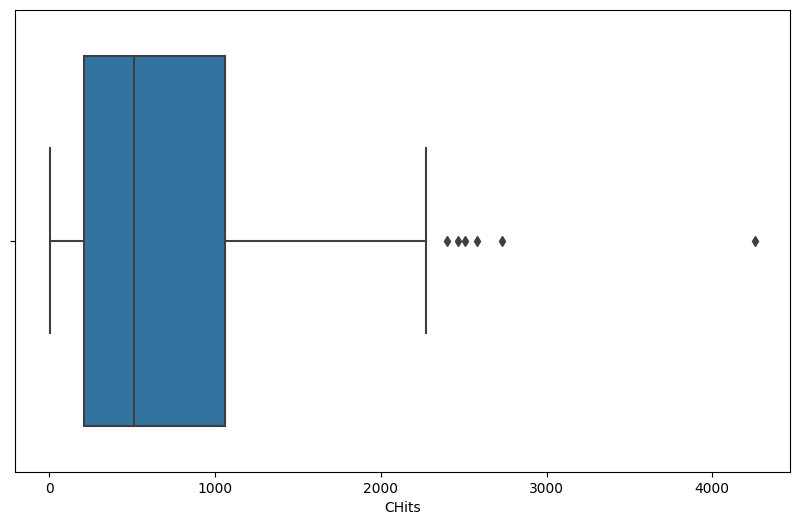

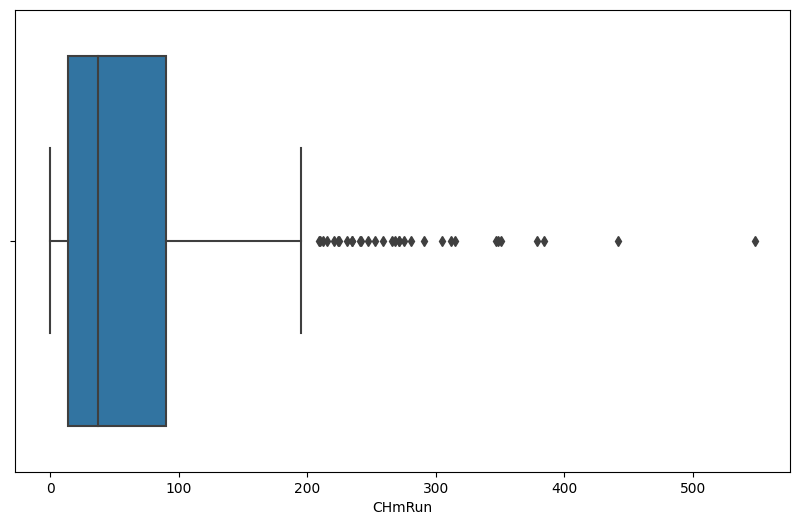

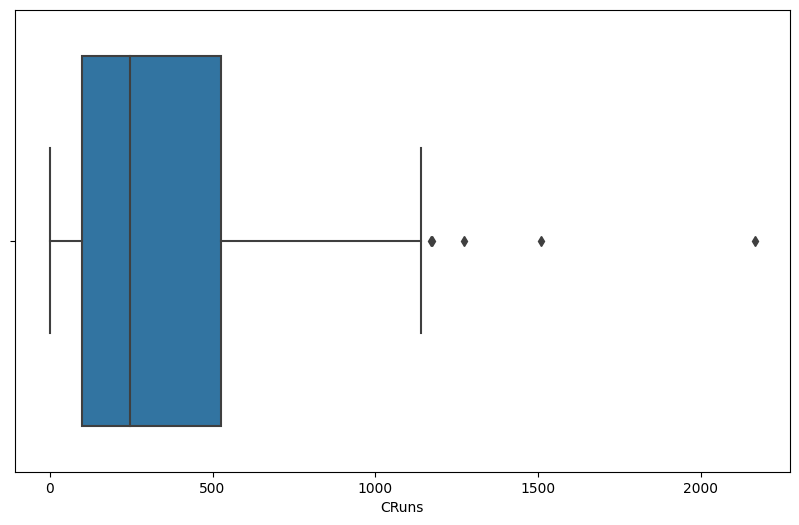

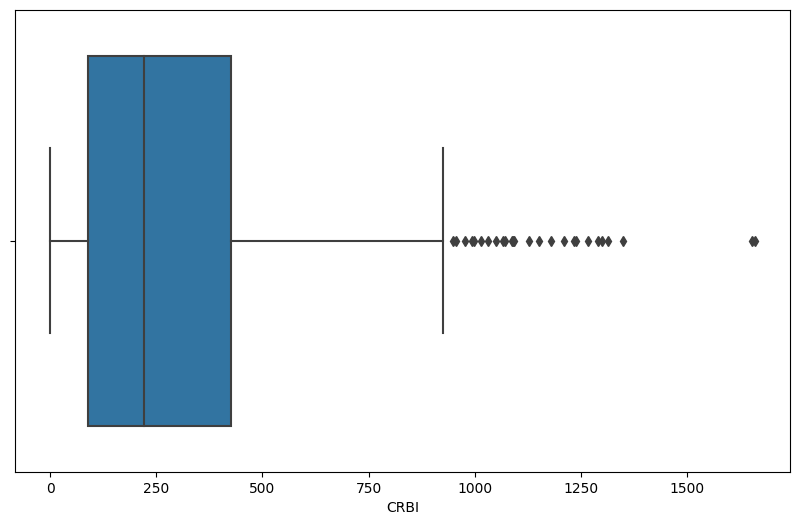

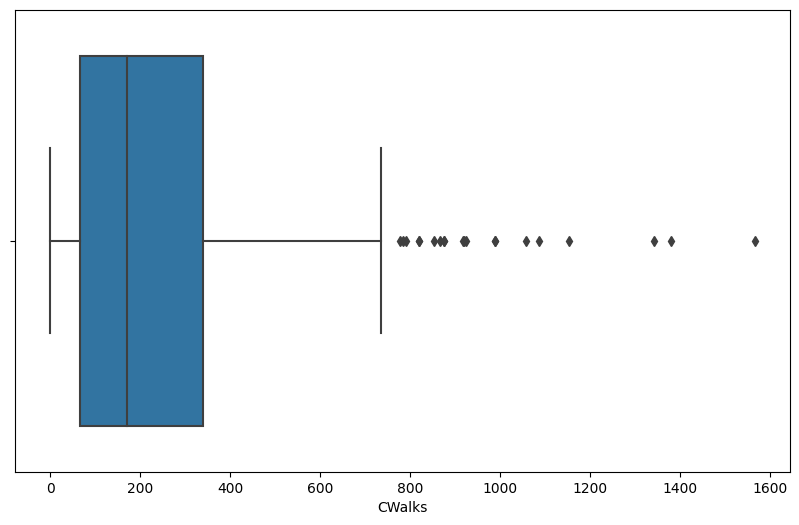

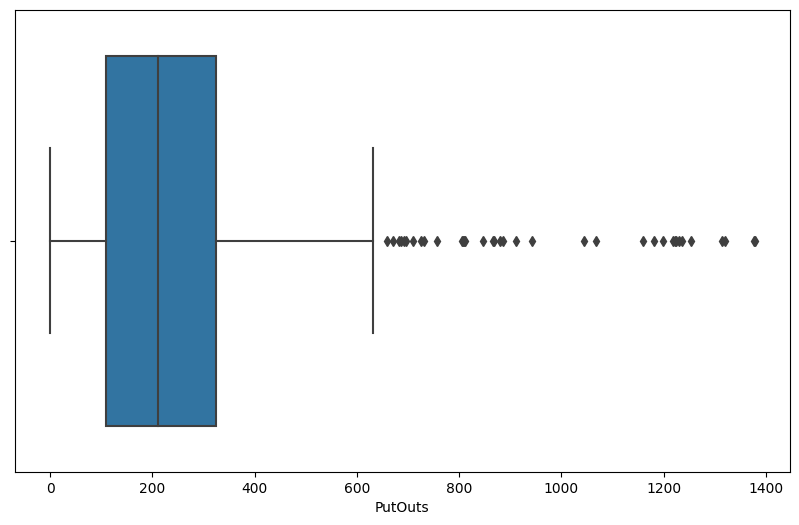

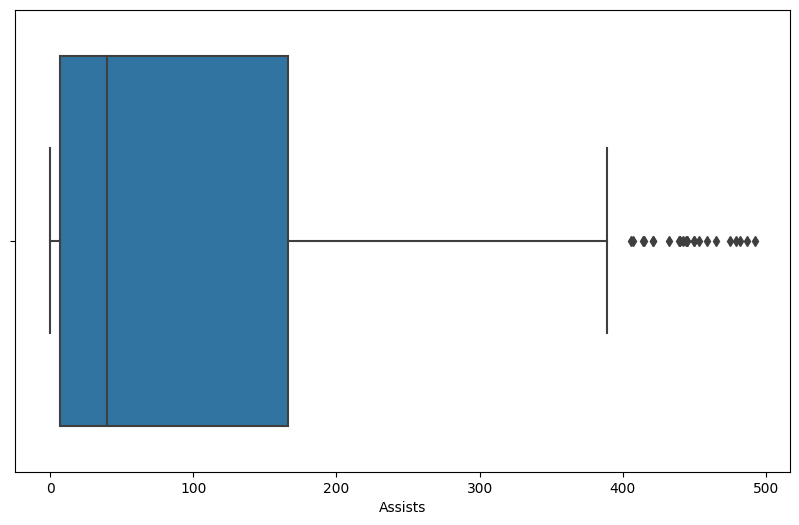

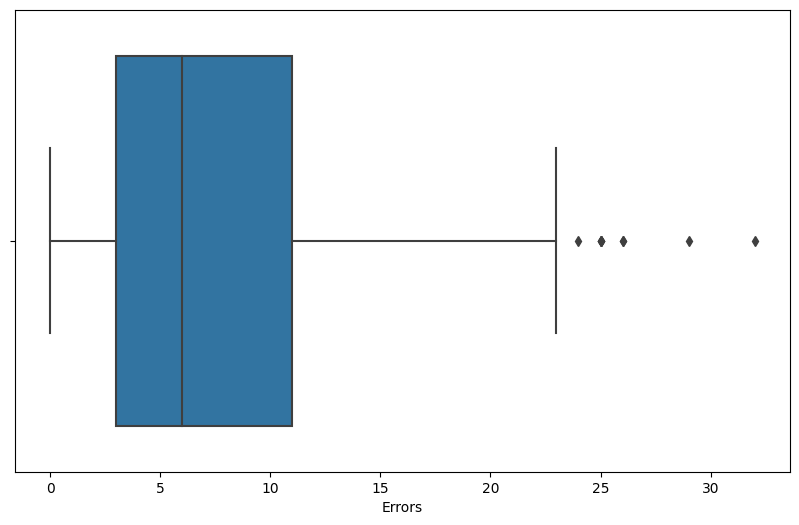

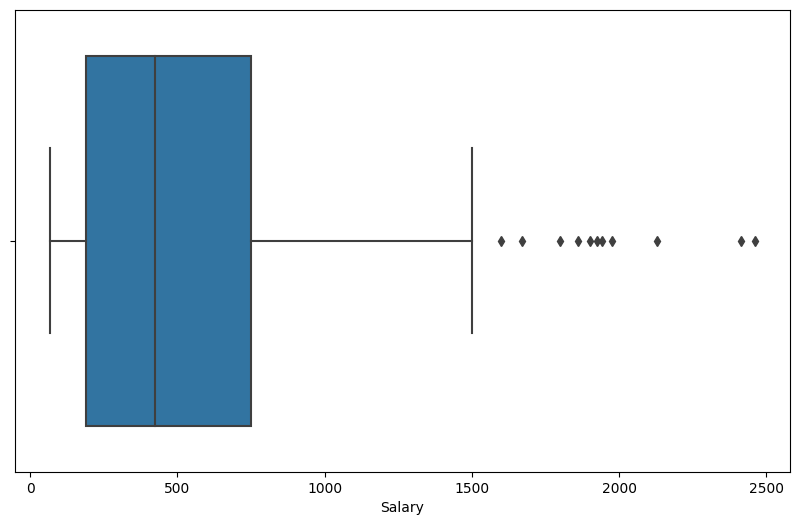

In [26]:
for col in num_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x = df[col])
    plt.show()
    

- #### For variables that are outliers, a trimming will be made from %5 - %95 of data.
- #### The reason for this attempt, is not changing distribution of variables too much. 
- #### Changing distribution can create bias.

In [27]:
def outlier_thresholds(dataframe, col_name, q1 = 0.05, q3 = 0.95):
    quartile1 = dataframe[col_name].quantile(0.05)
    quartile3 = dataframe[col_name].quantile(0.95)
    iqr = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    return low_limit, up_limit

In [28]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [29]:
for col in num_cols:
    outlier_thresholds(df, col)

In [30]:
for col in num_cols:
    replace_with_thresholds(df, col)

- #### There were some missing values in target variable. Imputing or modifying these values can change distribution of target variable may create bias in model.
- #### In the worst scenario, imputing can be used for dependent variables but changing target variable values is too risky.

In [31]:
df.dropna(inplace = True)

In [32]:
df.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

### Feature Extracting

- #### Need to make some adjusting before starting the feature extraction.

- #### There are 0 values in some dependent variables. 
- #### Explored that in checking numeric variables with describe method.
- #### Multiplying or dividing with 0 values might cause math based problems in the next section. Also we dont want to change distribution of data so adding +1 all of dependent variables should be work.

- #### Addition to these cautions, need to drop target variable and "Years" dependent variable from that process.
- #### Because there are no 0 values in "Years" and "Salary" variables.

In [33]:
num_cols_ = [col for col in num_cols if col not in ["Salary", "Years"]]

In [34]:
num_cols_

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [35]:
df[num_cols_] = df[num_cols_] + 1 

- #### Changed to uppercase letter type for ease of handling names.

In [36]:
df.columns = [col.upper() for col in df.columns]

In [37]:
df.columns

Index(['ATBAT', 'HITS', 'HMRUN', 'RUNS', 'RBI', 'WALKS', 'YEARS', 'CATBAT', 'CHITS', 'CHMRUN', 'CRUNS', 'CRBI', 'CWALKS', 'LEAGUE', 'DIVISION', 'PUTOUTS', 'ASSISTS', 'ERRORS', 'SALARY', 'NEWLEAGUE'], dtype='object')

- #### There are both current season variables and whole career metrics in variables. 
- #### Extracting a ratio for in specific season compare to whole career can contain information.

In [38]:
df["NEW_C_RUNS_RATIO"] = df["RUNS"] / df["CRUNS"]

In [39]:
df["NEW_C_ATBAT_RATIO"] = df["ATBAT"] / df["CATBAT"]

In [40]:
df["NEW_C_HITS_RATIO"] = df["HITS"] / df["CHITS"]

In [41]:
df["NEW_C_HMRUN_RATIO"] = df["HMRUN"] / df["CHMRUN"]

In [42]:
df["NEW_C_RBI_RATIO"] = df["RBI"] / df["CRBI"]

In [43]:
df["NEW_C_WALKS_RATIO"] = df["WALKS"] / df["CWALKS"]

In [44]:
df["NEW_C_HIT_RATE"] = df["CHITS"] / df["CATBAT"]

In [45]:
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]

In [46]:
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]

In [47]:
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]

In [48]:
df["NEW_C_HMATBAT_RATIO"] = df["CATBAT"] / df["CHMRUN"]

- #### In addition, dividing whole career numeric metrics with years can show yearly metrics so it may be contain information.

In [49]:
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]

In [50]:
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]

In [51]:
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]

In [52]:
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]

In [53]:
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]

In [54]:
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]

- #### Years can be correlated with experinece so dividing years into categorical classes should be work too.

In [55]:
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"

In [56]:
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"

In [57]:
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"

In [58]:
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"

- #### Combining playing position and categorical experince level variables can contain more sensetive information for success. It can be effect target variable.

- Expecting 4 x 2 = 8 classes in the variable.

In [59]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"

In [60]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"

In [61]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"

In [62]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"

In [63]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"

In [64]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"

In [65]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"

In [66]:
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

- #### There are 2 variables defining that new league and last league so creating a progress variables may be contain information.

In [67]:
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"

In [68]:
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"

In [69]:
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"

In [70]:
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

- #### Let's check if there is a relationship between the new variables and the target variable. 

In [71]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,LEAGUE,DIVISION,PUTOUTS,ASSISTS,ERRORS,SALARY,NEWLEAGUE,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,NEW_YEARS_LEVEL,NEW_DIV_CAT,NEW_PLAYER_PROGRESS
1,316.00,82.00,8.00,25.00,39,40.00,14,3450.00,836.00,70.00,322.00,415.00,376.00,N,W,633.00,44.00,11,475.00,N,0.08,0.09,0.10,0.11,0.09,0.11,0.24,0.50,0.39,0.08,49.29,246.43,59.71,5.00,23.00,29.64,26.86,Expert,Expert-West,StandN
2,480.00,131.00,19.00,67.00,73,77.00,3,1625.00,458.00,64.00,225.00,267.00,264.00,A,W,881.00,83.00,15,480.00,A,0.30,0.30,0.29,0.30,0.27,0.29,0.28,0.58,0.49,0.14,25.39,541.67,152.67,21.33,75.00,89.00,88.00,Mid,Mid-West,StandA
3,497.00,142.00,21.00,66.00,79,38.00,11,5629.00,1576.00,226.00,829.00,839.00,355.00,N,E,201.00,12.00,4,500.00,N,0.08,0.09,0.09,0.09,0.09,0.11,0.28,0.53,0.53,0.14,24.91,511.73,143.27,20.55,75.36,76.27,32.27,Expert,Expert-East,StandN
4,322.00,88.00,11.00,40.00,43,31.00,2,397.00,102.00,13.00,49.00,47.00,34.00,N,E,806.00,41.00,5,91.50,N,0.82,0.81,0.86,0.85,0.91,0.91,0.26,0.46,0.48,0.13,30.54,198.50,51.00,6.50,24.50,23.50,17.00,Junior,Junior-East,StandN
5,595.00,170.00,5.00,75.00,52,36.00,11,4409.00,1134.00,20.00,502.00,337.00,195.00,A,W,283.00,422.00,26,750.00,A,0.15,0.13,0.15,0.25,0.15,0.18,0.26,0.30,0.44,0.02,220.45,400.82,103.09,1.82,45.64,30.64,17.73,Expert,Expert-West,StandA


In [72]:
df.groupby("NEW_PLAYER_PROGRESS")["SALARY"].mean()

NEW_PLAYER_PROGRESS
Ascend    558.12
Descend   486.00
StandA    541.01
StandN    532.90
Name: SALARY, dtype: float64

- #### Classes of progress variable have almost same information.
- #### There are some differences but its not sharp.

In [73]:
df.groupby("NEW_DIV_CAT")["SALARY"].mean()

NEW_DIV_CAT
Expert-East   809.78
Expert-West   702.10
Junior-East   229.30
Junior-West   156.09
Mid-East      427.91
Mid-West      297.46
Senior-East   798.11
Senior-West   568.90
Name: SALARY, dtype: float64

- #### Level wise year variable carries distinctive information about the both experience of players and the region they play in.
- #### The impact rate may be high.

In [74]:
df.groupby("NEW_YEARS_LEVEL")["SALARY"].mean()

NEW_YEARS_LEVEL
Expert   755.11
Junior   186.92
Mid      359.34
Senior   691.89
Name: SALARY, dtype: float64

- #### Salaries are increasing with experince years. Variable seems like consistent.
- #### Its a informative variable so impact of this variable might be high.

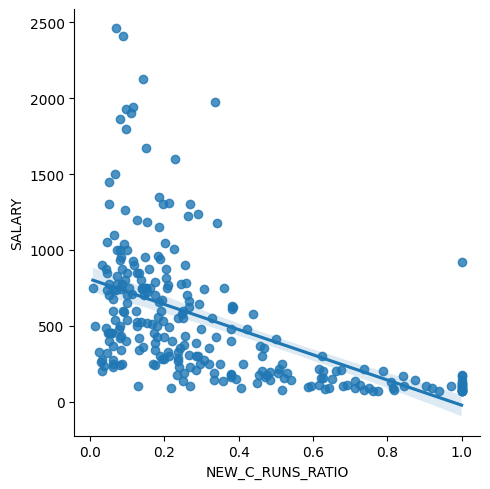

In [75]:
sns.lmplot(x = 'NEW_C_RUNS_RATIO', y = 'SALARY', data=df)

plt.show();

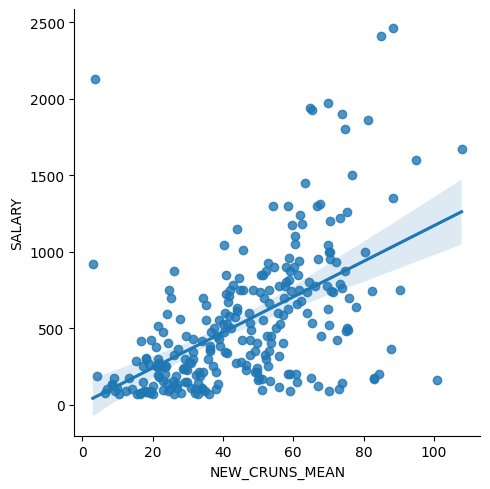

In [76]:
sns.lmplot(x = 'NEW_CRUNS_MEAN', y = 'SALARY', data=df)

plt.show();

- #### The correlation in the variable we created for CRUNS, one of the numerical variables, may be the current state of carrying information.

- Let's separate our variables again according to their structures. Categorically or Numerically.

In [77]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [78]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and \
              df[col].dtypes != "O"]

In [79]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and \
              df[col].dtypes == "O"]

In [80]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [81]:
cat_cols

['LEAGUE',
 'DIVISION',
 'NEWLEAGUE',
 'NEW_YEARS_LEVEL',
 'NEW_DIV_CAT',
 'NEW_PLAYER_PROGRESS']

In [82]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

In [83]:
num_cols

['ATBAT',
 'HITS',
 'HMRUN',
 'RUNS',
 'RBI',
 'WALKS',
 'YEARS',
 'CATBAT',
 'CHITS',
 'CHMRUN',
 'CRUNS',
 'CRBI',
 'CWALKS',
 'PUTOUTS',
 'ASSISTS',
 'ERRORS',
 'SALARY',
 'NEW_C_RUNS_RATIO',
 'NEW_C_ATBAT_RATIO',
 'NEW_C_HITS_RATIO',
 'NEW_C_HMRUN_RATIO',
 'NEW_C_RBI_RATIO',
 'NEW_C_WALKS_RATIO',
 'NEW_C_HIT_RATE',
 'NEW_C_RUNNER',
 'NEW_C_HIT-AND-RUN',
 'NEW_C_HMHITS_RATIO',
 'NEW_C_HMATBAT_RATIO',
 'NEW_CATBAT_MEAN',
 'NEW_CHITS_MEAN',
 'NEW_CHMRUN_MEAN',
 'NEW_CRUNS_MEAN',
 'NEW_CRBI_MEAN',
 'NEW_CWALKS_MEAN']

- #### Encoding is essential for distance based methods.

In [84]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [85]:
rare_analyser(df, "SALARY", cat_cols)

LEAGUE : 2
        COUNT  RATIO  TARGET_MEAN
LEAGUE                           
A         139   0.53       542.00
N         124   0.47       529.12


DIVISION : 2
          COUNT  RATIO  TARGET_MEAN
DIVISION                           
E           129   0.49       624.27
W           134   0.51       450.88


NEWLEAGUE : 2
           COUNT  RATIO  TARGET_MEAN
NEWLEAGUE                           
A            141   0.54       537.11
N            122   0.46       534.55


NEW_YEARS_LEVEL : 4
                 COUNT  RATIO  TARGET_MEAN
NEW_YEARS_LEVEL                           
Expert              65   0.25       755.11
Junior              38   0.14       186.92
Mid                 78   0.30       359.34
Senior              82   0.31       691.89


NEW_DIV_CAT : 8
             COUNT  RATIO  TARGET_MEAN
NEW_DIV_CAT                           
Expert-East     32   0.12       809.78
Expert-West     33   0.13       702.10
Junior-East     16   0.06       229.30
Junior-West     22   0.08       156.0

- #### There are observations below 1 percent in the Location x Experience variable. However, since I think these carry information in a fragmentary manner, I will not combine them.
- #### In the variable indicating the player's development, the class rates were equal to each other. Here two classes with 8 and 10 observations can be combined as Rare.

In [86]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = ["NEW_PLAYER_PROGRESS"]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [87]:
df = rare_encoder(df, 0.1)

In [88]:
df["NEW_PLAYER_PROGRESS"].value_counts()

NEW_PLAYER_PROGRESS
StandA    131
StandN    114
Rare       18
Name: count, dtype: int64

## One-Hot Encoding

In [89]:
df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)

## Numeric Scaler

In [90]:
num_cols.remove("SALARY")

- #### The reason for the keeping target variable is to be able to clearly see the difference between the predicted value and the actual value since I will use linear regression.

In [91]:
scaler = RobustScaler()

In [92]:
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [93]:
df_encoded.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,PUTOUTS,ASSISTS,ERRORS,SALARY,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,LEAGUE_N,DIVISION_W,NEWLEAGUE_N,NEW_YEARS_LEVEL_Junior,NEW_YEARS_LEVEL_Mid,NEW_YEARS_LEVEL_Senior,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
1,-0.40,-0.31,-0.15,-0.71,-0.22,0.06,1.33,0.50,0.38,0.37,0.18,0.56,0.78,1.95,-0.01,0.30,475.00,-0.40,-0.36,-0.33,-0.43,-0.36,-0.36,-0.66,0.27,-1.19,-0.02,0.11,-0.44,-0.51,-0.18,-0.69,-0.25,-0.12,True,True,True,False,False,False,True,False,False,False,False,False,False,False,True
2,0.27,0.39,0.69,0.35,0.61,1.15,-0.50,-0.10,-0.07,0.30,-0.07,0.11,0.35,3.14,0.20,0.70,480.00,0.21,0.27,0.24,0.08,0.14,0.20,0.61,0.73,-0.05,0.62,-0.41,0.96,1.02,1.63,0.95,1.59,2.77,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False
3,0.34,0.54,0.85,0.33,0.76,0.00,0.83,1.21,1.26,2.39,1.47,1.85,0.70,-0.11,-0.18,-0.40,500.00,-0.39,-0.37,-0.35,-0.50,-0.36,-0.36,0.55,0.46,0.32,0.66,-0.42,0.82,0.87,1.54,0.96,1.19,0.13,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True
4,-0.38,-0.23,0.08,-0.33,-0.12,-0.21,-0.67,-0.50,-0.49,-0.36,-0.52,-0.56,-0.55,2.78,-0.03,-0.30,91.50,1.65,1.88,1.97,1.63,1.95,2.10,-0.19,0.08,-0.17,0.48,-0.30,-0.67,-0.66,-0.01,-0.64,-0.44,-0.59,True,False,True,True,False,False,False,True,False,False,False,False,False,False,True
5,0.74,0.94,-0.38,0.56,0.10,-0.06,0.83,0.81,0.73,-0.27,0.64,0.32,0.08,0.28,2.04,1.80,750.00,-0.20,-0.23,-0.17,-0.05,-0.19,-0.12,-0.18,-0.79,-0.57,-0.79,3.84,0.29,0.20,-0.53,0.02,-0.22,-0.56,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False


In [94]:
df_encoded.shape

(263, 49)

## Modeling **w/Linear Regression**

In [95]:
X = df_encoded.drop("SALARY", axis = 1)

In [96]:
y = df_encoded["SALARY"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [98]:
lr_model = LinearRegression()

In [99]:
lr_model.fit(X_train, y_train)

LinearRegression()

- #### b-bias

In [100]:
lr_model.intercept_

797.0292038002178

- #### coefficients - weights - w

In [101]:
lr_model.coef_

array([-5.25125126e+02,  4.61459794e+02, -2.14693018e+02,  1.17123064e+02,
        2.13473898e+02,  1.46653821e+02, -4.52148194e+02, -3.07384848e+02,
       -4.30809560e+01, -1.46918921e+02,  5.24886998e+02,  2.94515158e+02,
       -6.27820357e+01,  4.05281443e+01, -1.09574267e+01,  4.51882355e+01,
       -6.25047713e+02,  1.18603267e+03, -6.11895776e+02,  1.04291978e+02,
       -2.56842502e+02, -1.96643260e+02, -9.82889554e+01, -1.82876362e+02,
       -2.31419291e+01,  1.81429789e+02,  3.45200585e+01, -7.93883401e+02,
        7.18592069e+02,  1.50198169e+02, -2.51578422e+02,  2.03829452e+02,
        7.09252693e+00,  1.79733801e+01, -9.16660797e+01,  6.51823828e-01,
       -1.13559728e+02, -2.26212604e+02, -6.59422883e+01,  4.72919475e+01,
       -1.08888139e+02, -4.67158951e+00, -1.25635583e+02, -1.00577021e+02,
       -3.22328712e+01, -3.37094170e+01, -1.35967369e+02, -1.17342165e+02])

- #### Linear Regression y_hat = b + w * x

In [102]:
X_train.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,CRUNS,CRBI,CWALKS,PUTOUTS,ASSISTS,ERRORS,NEW_C_RUNS_RATIO,NEW_C_ATBAT_RATIO,NEW_C_HITS_RATIO,NEW_C_HMRUN_RATIO,NEW_C_RBI_RATIO,NEW_C_WALKS_RATIO,NEW_C_HIT_RATE,NEW_C_RUNNER,NEW_C_HIT-AND-RUN,NEW_C_HMHITS_RATIO,NEW_C_HMATBAT_RATIO,NEW_CATBAT_MEAN,NEW_CHITS_MEAN,NEW_CHMRUN_MEAN,NEW_CRUNS_MEAN,NEW_CRBI_MEAN,NEW_CWALKS_MEAN,LEAGUE_N,DIVISION_W,NEWLEAGUE_N,NEW_YEARS_LEVEL_Junior,NEW_YEARS_LEVEL_Mid,NEW_YEARS_LEVEL_Senior,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
95,-0.13,0.23,0.31,0.05,0.27,-0.03,1.00,0.07,0.09,0.01,0.09,0.19,0.21,-0.79,0.60,0.20,-0.08,-0.09,-0.02,0.18,-0.06,-0.19,0.51,0.27,-0.13,-0.18,0.14,-0.77,-0.68,-0.34,-0.66,-0.40,-0.50,True,True,True,False,False,False,True,False,False,False,False,False,False,False,True
27,0.25,0.37,0.08,-0.05,0.22,0.09,0.67,0.13,0.10,0.27,-0.01,0.29,-0.03,2.43,0.21,0.60,-0.04,-0.02,0.02,-0.26,-0.14,0.06,-0.11,0.51,-0.94,0.19,-0.15,-0.50,-0.50,-0.04,-0.64,-0.15,-0.61,True,True,True,False,False,True,False,False,False,False,False,False,True,False,True
129,0.64,0.94,0.92,0.51,1.00,0.03,0.17,0.60,0.67,1.29,0.62,1.09,0.35,0.34,-0.16,-0.20,-0.20,-0.18,-0.15,-0.32,-0.20,-0.24,0.78,0.54,-0.42,0.52,-0.39,0.93,1.04,1.49,0.81,1.44,0.39,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False
319,0.25,0.33,-0.46,0.23,-0.10,0.44,0.00,-0.08,-0.10,-0.43,-0.08,-0.42,-0.11,-0.89,0.37,0.00,0.18,0.22,0.26,0.65,0.69,0.41,-0.25,-1.22,0.07,-0.78,3.67,-0.26,-0.31,-0.58,-0.27,-0.68,-0.24,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False
70,-0.42,-0.31,-0.46,-0.25,-0.41,-0.32,1.83,2.07,2.00,0.77,1.79,2.06,2.00,-0.34,0.97,0.30,-0.49,-0.53,-0.51,-0.65,-0.53,-0.57,0.12,-0.17,-0.68,-0.46,0.81,0.69,0.64,-0.07,0.35,0.49,0.53,True,True,True,False,False,False,True,False,False,False,False,False,False,False,True


- #### Prediction 2. indexed row in X_train.

In [103]:
np.inner(X_train.iloc[2, :].values, lr_model.coef_) + lr_model.intercept_

1113.5346995640225

In [104]:
y_train.iloc[2]

950.0

In [105]:
np.inner(X_train.iloc[4, :].values, lr_model.coef_) + lr_model.intercept_

464.6047963840002

In [106]:
y_train.iloc[4]

320.0

- #### Train RMSE

In [107]:
y_pred = lr_model.predict(X_train)

In [108]:
np.sqrt(mean_squared_error(y_train, y_pred))

238.5114100473349

- #### Train R-squared

In [109]:
lr_model.score(X_train, y_train)

0.7396680763991572

- #### Test RMSE

In [110]:
y_pred = lr_model.predict(X_test)

In [111]:
np.sqrt(mean_squared_error(y_test, y_pred))

232.24499727532498

In [112]:
lr_model.score(X_test, y_test)

0.6125760417346662

- #### Used Holdout method as you can see so scores are not stable and satifying so triying 10 Fold Cross Validation can help to evaluate results.

In [113]:
np.mean(np.sqrt(-cross_val_score(lr_model,
                                X,
                                y,
                                cv = 10,
                                scoring = "neg_mean_squared_error")))

296.69280034207566

- #### There is a large decrease in R square values between the train and test sets.
- #### This actually shows that the variables represented the data set well in the training part, but decreased in the testing part, meaning that the model memorized the observations and could not generalize them.This means overfit 🤦‍♂️.

- #### It's actually not surprising to see model overfitting.
- #### There are 49 features for almost 300 observations in the last stage of feature engineering. There were too many variables for this much data and the number of data in each class was small. Therefore, the model is expected to memorize the data set.

- #### If we proceed in the correlation stage by removing dependent variables with high correlations from the data set, this overfit rate will decrease.
- #### In addition, using different modeling algorithms can change results. In iterative models, we have the ability to see the learning situation on an iteration basis so that evaluation can be made.
- #### Of course adding more data intuitively comes to mind as first solution.

- #### Reducing the low representation of classes, used rare encoding but this method can not able to evaluate feature importances.
- #### Using iterative methods can solve this problem.